In [1]:
# Install (usually already there on Colab, but safe to run)
!pip -q install scikit-learn pandas matplotlib seaborn

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [2]:
data = load_breast_cancer()   # built-in dataset (no download needed)
X = pd.DataFrame(data.data, columns=data.feature_names)  # features (numbers)
y = pd.Series(data.target)    # labels: 0 = malignant, 1 = benign

X.head(), y.value_counts()


(   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst radius  worst texture  worst perimeter 

In [3]:
# Split the data: 80% to learn, 20% to test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test), y_train.mean()


(455, 114, np.float64(0.6263736263736264))

In [4]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # learn scaling from training data
X_test_s  = scaler.transform(X_test)       # apply same scaling to test data

X_train_s[:2]


array([[-1.07200079e+00, -6.58424598e-01, -1.08808010e+00,
        -9.39273639e-01, -1.35939882e-01, -1.00871795e+00,
        -9.68358632e-01, -1.10203235e+00,  2.81062120e-01,
        -1.13231479e-01, -7.04860874e-01, -4.40938351e-01,
        -7.43948977e-01, -6.29804931e-01,  7.48061001e-04,
        -9.91572979e-01, -6.93759567e-01, -9.83284458e-01,
        -5.91579010e-01, -4.28972052e-01, -1.03409427e+00,
        -6.23497432e-01, -1.07077336e+00, -8.76534437e-01,
        -1.69982346e-01, -1.03883630e+00, -1.07899452e+00,
        -1.35052668e+00, -3.52658049e-01, -5.41380026e-01],
       [ 1.74874285e+00,  6.65017334e-02,  1.75115682e+00,
         1.74555856e+00,  1.27446827e+00,  8.42288215e-01,
         1.51985232e+00,  1.99466430e+00, -2.93045055e-01,
        -3.20179716e-01,  1.27567198e-01, -3.81382677e-01,
         9.40746962e-02,  3.17524379e-01,  6.39656015e-01,
         8.73892616e-02,  7.08450758e-01,  1.18215034e+00,
         4.26212305e-01,  7.47970186e-02,  1.22834212e+

In [5]:
logreg = LogisticRegression(max_iter=500, random_state=42)
logreg.fit(X_train_s, y_train)

y_pred_lr = logreg.predict(X_test_s)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", round(acc_lr, 3))


Logistic Regression accuracy: 0.982


In [6]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # RF doesn’t need scaling

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", round(acc_rf, 3))


Random Forest accuracy: 0.956


LogReg:


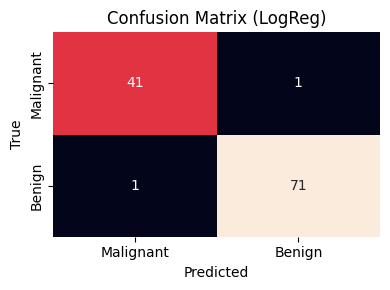

Random Forest:


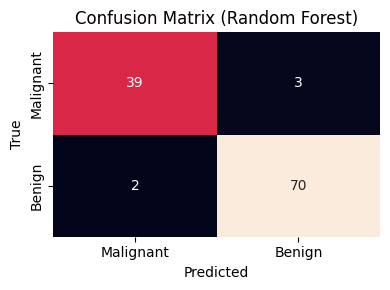

In [7]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False,
                xticklabels=["Malignant","Benign"],
                yticklabels=["Malignant","Benign"])
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.title(title)
    plt.tight_layout(); plt.show()
    return cm

print("LogReg:")
cm_lr = plot_confusion(y_test, y_pred_lr, "Confusion Matrix (LogReg)")

print("Random Forest:")
cm_rf = plot_confusion(y_test, y_pred_rf, "Confusion Matrix (Random Forest)")


In [8]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr, target_names=["Malignant","Benign"]))
print("Random Forest:\n", classification_report(y_test, y_pred_rf, target_names=["Malignant","Benign"]))


Logistic Regression:
               precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Forest:
               precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



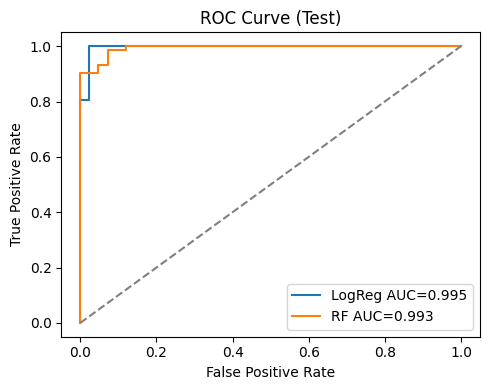

In [9]:
# For ROC we need predicted probabilities for the positive class (Benign=1)
y_prob_lr = logreg.predict_proba(X_test_s)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(5,4))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg AUC={auc_lr:.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"RF AUC={auc_rf:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend()
plt.tight_layout(); plt.show()


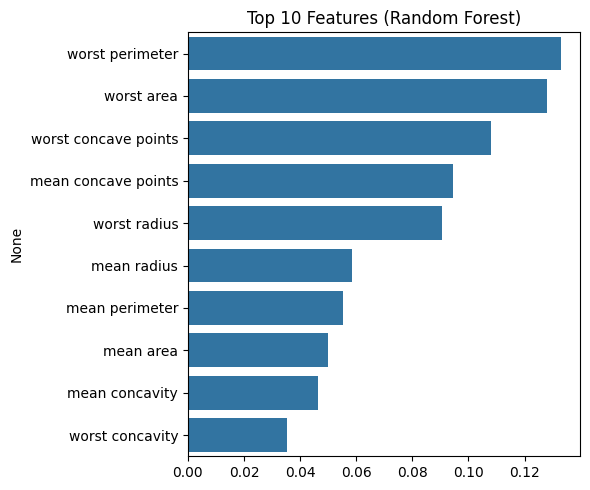

,0
worst perimeter,0.133100
worst area,0.128052
worst concave points,0.108107
mean concave points,0.094414
worst radius,0.090639
mean radius,0.058662
mean perimeter,0.055242
mean area,0.049938
mean concavity,0.046207
worst concavity,0.035357


In [10]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=imp.values[:10], y=imp.index[:10])
plt.title("Top 10 Features (Random Forest)")
plt.tight_layout(); plt.show()

imp.head(10)


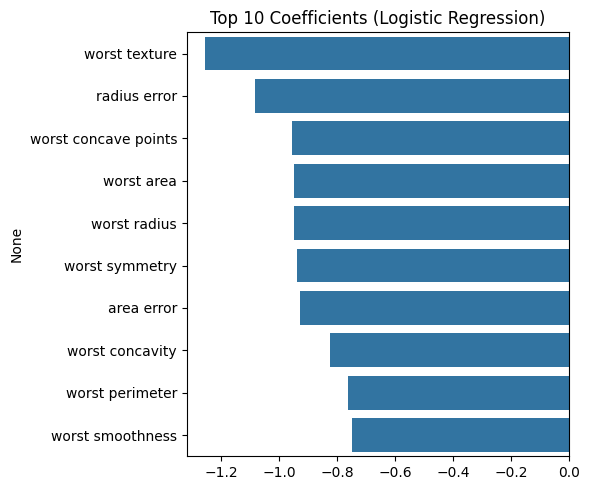

,0
worst texture,-1.255088
radius error,-1.082965
worst concave points,-0.953686
worst area,-0.947756
worst radius,-0.947616
worst symmetry,-0.939181
area error,-0.929104
worst concavity,-0.823151
worst perimeter,-0.763220
worst smoothness,-0.746625


In [11]:
coefs = pd.Series(logreg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(6,5))
sns.barplot(x=coefs.values[:10], y=coefs.index[:10])
plt.title("Top 10 Coefficients (Logistic Regression)")
plt.tight_layout(); plt.show()

coefs.head(10)


Saved: breast_cancer_roc.png


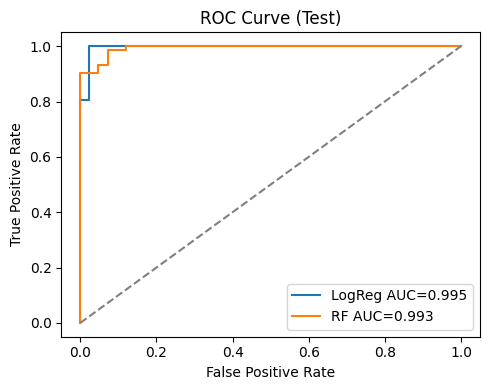

In [12]:
# Save ROC as a PNG
plt.figure(figsize=(5,4))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg AUC={auc_lr:.3f}")
plt.plot(fpr_rf, tpr_rf, label=f"RF AUC={auc_rf:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend()
plt.tight_layout()
plt.savefig("breast_cancer_roc.png", dpi=200, bbox_inches="tight")
print("Saved: breast_cancer_roc.png")
